## Prepare the staging environment

In [2]:
%env WEB_BASE_URL=https://hub.crunchdao.io
%env API_BASE_URL=http://api.hub.crunchdao.io

env: WEB_BASE_URL=https://hub.crunchdao.io
env: API_BASE_URL=http://api.hub.crunchdao.io


In [3]:
%pip install crunch-cli==4.0.0b5

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
Note: you may need to restart the kernel to use updated packages.


### Get a token

**DO NOT UPGRADE THE CLI**

https://hub.crunchdao.io/competitions/enders/submit/via/notebook

In [5]:
!crunch setup --notebook enders test-antoine --token ysxK95nzLQNiFWkf4r24sMtIDIQ9hFbB2OLM39BvWEbbUkqaUIafYLvd6sReN2aR

delete ./.crunchdao
you appear to have never submitted code before
download data/X_train.parquet from https:crunchdao--competition--staging.s3.eu-west-1.amazonaws.com/data-releases/71/X_train.parquet (1527571 bytes)
download data/y_train.parquet from https:crunchdao--competition--staging.s3.eu-west-1.amazonaws.com/data-releases/71/y_train.parquet (1251294 bytes)
download data/X_test.parquet from https:crunchdao--competition--staging.s3.eu-west-1.amazonaws.com/data-releases/71/X_test_reduced.parquet (162262 bytes)
download data/y_test.parquet from https:crunchdao--competition--staging.s3.eu-west-1.amazonaws.com/data-releases/71/y_test_reduced.parquet (165953 bytes)
download data/example_prediction.parquet from https:crunchdao--competition--staging.s3.eu-west-1.amazonaws.com/data-releases/71/example_prediction_reduced.parquet (165953 bytes)
                                                                                
---
Success! Your environment has been correctly setup.
Next recomme

## The submission

In [6]:
import typing
import random

import crunch
crunch = crunch.load_notebook()

loaded inline runner with module: <module '__main__'>


In [7]:
def train(
    streams: typing.List[typing.Iterable[float]]
):
    for stream in streams:
        pass
    print("training done")

In [8]:
def infer(
    stream: typing.Iterator[dict],
    horizon: int
):
    a = 0.01
    running_avg: int = None

    yield  # mark as ready

    for d in stream:
        x= d["x"]
        # tick
        if running_avg is None:
            running_avg = x
        else:
            running_avg = (1 - a) * running_avg + a * x

        # predict
        if x > running_avg + 2:
            yield -1
        elif x < running_avg - 2:
            yield 1
        else:
            # yield 0
            yield random.randint(-1, 1)

In [21]:
prediction = crunch.test(
    no_determinism_check=True
)

13:32:42 no forbidden library found
13:32:42 
13:32:42 started
13:32:42 running local test
13:32:42 internet access isn't restricted, no check will be done
13:32:42 
13:32:44 starting stream loop...


download data/X_train.parquet from https:crunchdao--competition--staging.s3.eu-west-1.amazonaws.com/data-releases/71/X_train.parquet (1527571 bytes)
already exists: file length match
download data/y_train.parquet from https:crunchdao--competition--staging.s3.eu-west-1.amazonaws.com/data-releases/71/y_train.parquet (1251294 bytes)
already exists: file length match
download data/X_test.parquet from https:crunchdao--competition--staging.s3.eu-west-1.amazonaws.com/data-releases/71/X_test_reduced.parquet (162262 bytes)
already exists: file length match
download data/y_test.parquet from https:crunchdao--competition--staging.s3.eu-west-1.amazonaws.com/data-releases/71/y_test_reduced.parquet (165953 bytes)
already exists: file length match
download data/example_prediction.parquet from https:crunchdao--competition--staging.s3.eu-west-1.amazonaws.com/data-releases/71/example_prediction_reduced.parquet (165953 bytes)
already exists: file length match


13:32:44 call: train - stream.len=80
13:32:44 looping stream=`aud-jpy` (1/20)
13:32:44 call: infer (1/1)
13:32:44 looping stream=`aud-nzd` (2/20)
13:32:44 call: infer (1/1)
13:32:44 looping stream=`aud-usd` (3/20)
13:32:44 call: infer (1/1)
13:32:44 looping stream=`eur-aud` (4/20)
13:32:45 call: infer (1/1)
13:32:45 looping stream=`eur-chf` (5/20)
13:32:45 call: infer (1/1)
13:32:45 looping stream=`eur-gbp` (6/20)
13:32:45 call: infer (1/1)
13:32:45 looping stream=`eur-jpy` (7/20)
13:32:45 call: infer (1/1)
13:32:45 looping stream=`eur-nok` (8/20)
13:32:45 call: infer (1/1)
13:32:45 looping stream=`eur-usd` (9/20)
13:32:45 call: infer (1/1)
13:32:45 looping stream=`gbp-aud` (10/20)
13:32:45 call: infer (1/1)
13:32:45 looping stream=`gbp-jpy` (11/20)
13:32:45 call: infer (1/1)


training done


13:32:45 looping stream=`gbp-usd` (12/20)
13:32:45 call: infer (1/1)
13:32:45 looping stream=`nzd-jpy` (13/20)
13:32:45 call: infer (1/1)
13:32:45 looping stream=`nzd-usd` (14/20)
13:32:45 call: infer (1/1)
13:32:45 looping stream=`usd-cad` (15/20)
13:32:45 call: infer (1/1)
13:32:45 looping stream=`usd-chf` (16/20)
13:32:45 call: infer (1/1)
13:32:45 looping stream=`usd-jpy` (17/20)
13:32:45 call: infer (1/1)
13:32:45 looping stream=`usd-mxn` (18/20)
13:32:45 call: infer (1/1)
13:32:45 looping stream=`usd-sgd` (19/20)
13:32:45 call: infer (1/1)
13:32:45 looping stream=`usd-zar` (20/20)
13:32:45 call: infer (1/1)
13:32:45 save prediction - path=data/prediction.csv
13:32:46 prediction is valid
13:32:46 ended
13:32:46 duration - time=00:00:03
13:32:46 memory - before="157.72 MB" after="253.38 MB" consumed="95.66 MB"


In [9]:
streams, _ = crunch.load_streams()

download data/X_train.parquet from https:crunchdao--competition--staging.s3.eu-west-1.amazonaws.com/data-releases/71/X_train.parquet (1527571 bytes)
already exists: file length match
download data/y_train.parquet from https:crunchdao--competition--staging.s3.eu-west-1.amazonaws.com/data-releases/71/y_train.parquet (1251294 bytes)
already exists: file length match
download data/X_test.parquet from https:crunchdao--competition--staging.s3.eu-west-1.amazonaws.com/data-releases/71/X_test_reduced.parquet (162262 bytes)
already exists: file length match
download data/y_test.parquet from https:crunchdao--competition--staging.s3.eu-west-1.amazonaws.com/data-releases/71/y_test_reduced.parquet (165953 bytes)
already exists: file length match
download data/example_prediction.parquet from https:crunchdao--competition--staging.s3.eu-west-1.amazonaws.com/data-releases/71/example_prediction_reduced.parquet (165953 bytes)
already exists: file length match


In [10]:
%load_ext autoreload
%autoreload 2

In [11]:
from endersgame.widgets import replay

HTML(value='\n<style>\n    .table { \n        width: 100%; \n        margin-bottom: 1rem; \n        background…

TICK 4705.047619047441 2 -1.0


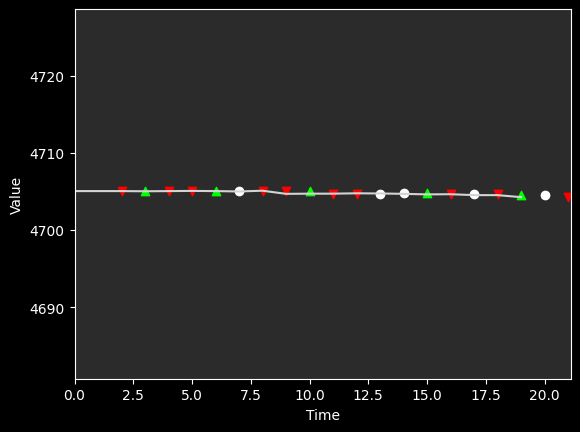

TICK 4705.047619047441 2 1.0
RESOLVE
TICK 4705.047619047441 2 -1.0
TICK 4705.023809523631 2 -1.0
TICK 4705.047619047441 2 1.0
TICK 4705.07142857125 2 0.0
TICK 4705.047619047441 2 -1.0
TICK 4704.999999999822 2 -1.0
TICK 4705.09523809506 2 1.0
TICK 4704.690476190298 2 -1.0
TICK 4704.714285714108 2 -1.0
TICK 4704.714285714108 2 0.0
TICK 4704.761904761726 2 0.0
TICK 4704.738095237917 2 1.0
TICK 4704.690476190298 2 -1.0
TICK 4704.619047618869 2 0.0
TICK 4704.642857142679 2 -1.0
TICK 4704.523809523631 2 1.0
TICK 4704.523809523631 2 0.0
TICK 4704.261904761726 2 -1.0
TICK 4704.523809523631 2 0.0


KeyboardInterrupt: 

In [14]:
replay(streams, 2)